In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Replace 'dataset.csv' with the path to your CSV file
file_path = 'spam_assasin_email_text.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)

shape = df.shape
print(shape)

# directly assign the value of text instead of messing around with the df.
x = df['text']
y = df['label']

# x = df.rename(columns={'label': 'message'}, inplace=True)

(5640, 2)


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import TextVectorization, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras import Sequential

# Load your dataset
# Assuming you have a DataFrame named 'data' with columns 'label' and 'text'
# Replace this with your actual data loading code
data = pd.read_csv('spam_assasin_email_text.csv')

# Preprocessing
# Convert labels to numerical values
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Tokenization and embedding using TensorFlow layers
max_tokens = 10000  # Maximum number of tokens
embedding_dim = 128  # Dimension of word embeddings
max_len = 100  # Maximum length of sequences

# Create TextVectorization layer for tokenization
text_vectorizer = TextVectorization(max_tokens=max_tokens, output_mode='int', output_sequence_length=max_len)

# Fit the TextVectorization layer on your text data
text_vectorizer.adapt(X_train)

# Tokenize and pad sequences for training and testing data
X_train_seq = text_vectorizer(X_train)
X_test_seq = text_vectorizer(X_test)

# Building the CNN model
model = Sequential([
    Embedding(input_dim=max_tokens, output_dim=embedding_dim),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
epochs = 5  # Number of training epochs
batch_size = 32

model.fit(X_train_seq, y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test_seq, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test_seq, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7738 - loss: 0.4374 - val_accuracy: 0.9770 - val_loss: 0.0856
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9899 - loss: 0.0420 - val_accuracy: 0.9752 - val_loss: 0.0969
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9973 - loss: 0.0167 - val_accuracy: 0.9734 - val_loss: 0.1372
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9986 - loss: 0.0113 - val_accuracy: 0.9663 - val_loss: 0.1339
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9983 - loss: 0.0081 - val_accuracy: 0.9761 - val_loss: 0.1605
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9710 - loss: 0.2517
Test Accuracy: 0.9760638475418091


In [19]:
from sklearn.metrics import classification_report

# Predict probabilities for the test set
y_pred_proba = model.predict(X_test_seq)

# Convert probabilities to binary predictions
y_pred = (y_pred_proba > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred))


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       820
           1       0.97      0.94      0.96       308

    accuracy                           0.98      1128
   macro avg       0.97      0.97      0.97      1128
weighted avg       0.98      0.98      0.98      1128



In [20]:
from sklearn.metrics import f1_score

# Compute F1-score for the positive class (spam)
f1_score_spam = f1_score(y_test, y_pred)

print("F1-score for the positive class (spam):", f1_score_spam)


F1-score for the positive class (spam): 0.9556650246305419


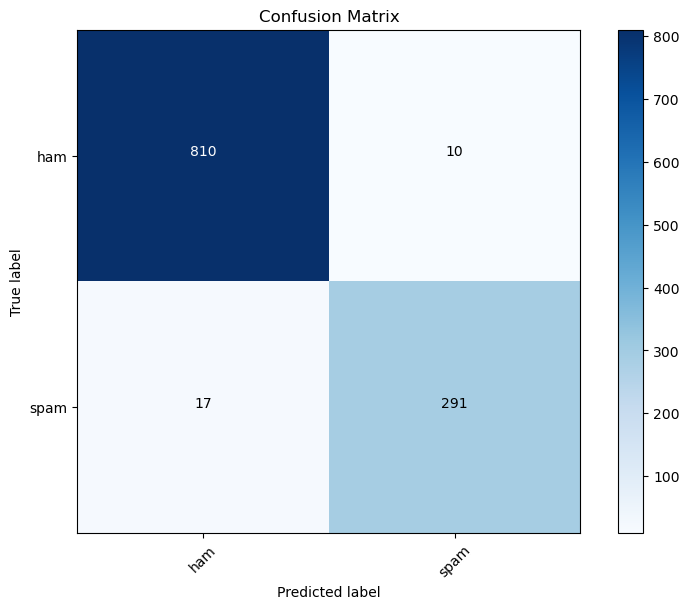

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['ham', 'spam']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i, j in ((i, j) for i in range(len(conf_matrix)) for j in range(len(conf_matrix[0]))):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
